In [1]:
# Import required modules
import pandas as pd
import glob2 # Finds all path names that match a specific pattern
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Specify paths to files
master_path = r'C:\Users\MT1070\Desktop\Master Call Volume\pilot-extracts'

# Display names of files in folder
call_volume_path = r'C\Users\MT1070\Desktop\Master Call Volume\call-volume-extracts'
call_volume_extracts = glob2.glob(call_volume_path + "/*.xlsx")

speech_report_path = r'C\Users\MT1070\Desktop\Master Call Volume\speech-report-extracts'
speech_report_extracts = glob2.glob(speech_report_path + "/*.xlsx")


# Initialize an empty data frame to store data from all files
final_sheet = pd.DataFrame()

In [3]:
# Iteratively read data extracts and append them to the final DataFrame
for file in call_volume_extracts:
    try:
        df = pd.read_excel(file, sheet_name=None, skipfooter=2, engine='openpyxl')
        df_concat = pd.concat(df.values(), ignore_index=True, sort=False)
        final_sheet = final_sheet.append(df_concat, ignore_index=True)
    except Exception as e:
        print(f"Error occurred while processing file: {file}")
        print(str(e))

c:\Users\MT1070\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\MT1070\AppData\Local\Temp\ipykernel_19580\75114571.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_sheet = final_sheet.append(df_concat, ignore_index=True)
c:\Users\MT1070\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\MT1070\AppData\Local\Temp\ipykernel_19580\75114571.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_sheet = final_sheet.append(df_concat, ignore_index=True)
c:\Users\MT1070\Anaconda

In [4]:
# Combine data into a new Excel file
master_file_path = r"C:\Users\MT1070\Desktop\Master Call Volume\SpinSci Call Volume Evaluation.xlsx"
final_sheet.to_excel(master_file_path, sheet_name='Raw Data', index=False)

In [5]:
final_sheet.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,date,total_internal_calls,total_external_calls,total_english_calls,total_spanish_calls,total_option1_selected,total_option2_selected,total_option3_selected,total_option4_selected,total_option5_selected,total_unique_calls,total_calls_transfered,total_max_ninm_calls,total_calls_during_non_peak,total_calls_during_peak,total_hangup_calls,total_max_ni_calls,total_max_nm_calls
1,3/10/23,24.0,105.0,91.0,1.0,10.0,34.0,27.0,4.0,0.0,94.0,88.0,0.0,129.0,0.0,0.0,0.0,0.0
2,3/9/23,407.0,2364.0,2002.0,30.0,666.0,622.0,320.0,43.0,15.0,1885.0,1879.0,41.0,365.0,2406.0,0.0,36.0,5.0
3,date,total_internal_calls,total_external_calls,total_english_calls,total_spanish_calls,total_option1_selected,total_option2_selected,total_option3_selected,total_option4_selected,total_option5_selected,total_unique_calls,total_calls_transfered,total_max_ninm_calls,total_calls_during_non_peak,total_calls_during_peak,total_hangup_calls,total_max_ni_calls,total_max_nm_calls
4,3/10/23,415.0,2366.0,1986.0,25.0,617.0,593.0,363.0,50.0,10.0,1865.0,1853.0,34.0,390.0,2391.0,0.0,28.0,6.0


In [6]:
# Specify paths to files
file_path = r'C:\Users\MT1070\Desktop\Master Call Volume\SpinSci Call Volume Evaluation.xlsx'

# Read file and skip the first row
df = pd.read_excel(file_path, skiprows=[0])

In [7]:
# Reformat date col and Remove rows where "date" is present in the "date" column
data = df[~df['date'].str.contains('date', case=False, na=False)]
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y')

# Filter the data to include only dates within the year 2023
data.loc[data['date'].dt.year != 2023, 'date'] = data.loc[data['date'].dt.year != 2023, 'date'].apply(lambda x: x.replace(year=2023))

# Group the data set based on calendar date
filtered_data = data.groupby("date").sum()

# Reset index to use data col
filtered_data = filtered_data.reset_index()

C:\Users\MT1070\AppData\Local\Temp\ipykernel_19580\638596111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y')


In [7]:
# Create column by weekday
filtered_data['weekday'] = filtered_data['date'].dt.dayofweek

In [8]:
filtered_data.head()

,date,total_internal_calls,total_external_calls,total_english_calls,total_spanish_calls,total_option1_selected,total_option2_selected,total_option3_selected,total_option4_selected,total_option5_selected,total_unique_calls,total_calls_transfered,total_max_ninm_calls,total_calls_during_non_peak,total_calls_during_peak,total_hangup_calls,total_max_ni_calls,total_max_nm_calls
0,2023-03-07,992,2500,2053,251,763,593,392,214,58,1840,1928,210,439,2412,0,38,4
1,2023-03-08,2016,4842,3893,523,1520,1068,781,402,80,3761,3678,348,881,4692,0,55,6
2,2023-03-09,1130,2766,2260,249,801,662,485,217,67,2119,2157,195,764,2406,0,36,7
3,2023-03-10,1017,2592,2105,210,701,627,438,215,56,1959,1987,175,558,2391,0,28,6
4,2023-03-11,287,847,701,67,148,215,250,95,17,661,712,36,347,633,0,10,0


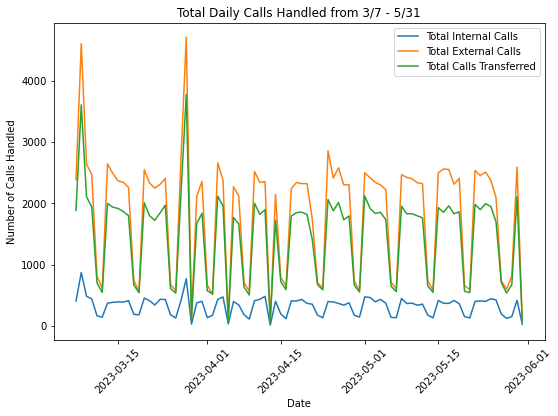

In [10]:
# Plotting internal, external, and call transfers call volumes overlayed
# Creating subplots
fig, axes = plt.subplots(figsize=(8, 6))

# Plotting the first subplot
line1, = axes.plot(filtered_data['date'], filtered_data['total_internal_calls'], label='Total Internal Calls')
line2, = axes.plot(filtered_data['date'], filtered_data['total_external_calls'], label='Total External Calls') 
line3, = axes.plot(filtered_data['date'], filtered_data['total_calls_transfered'], label='Total Calls Transferred') 

axes.set_xlabel('Date')
axes.set_ylabel('Number of Calls Handled')
axes.set_title('Total Daily Calls Handled from 3/7 - 5/31')

# Adjusting the x-axis tick labels
plt.setp(axes.xaxis.get_majorticklabels(), rotation=45)

# Add legend
axes.legend(handles=[line1, line2, line3], loc='upper right')

# Adjusting the spacing between subplots
plt.tight_layout(pad=1.5)

# Displaying the plots
plt.show()

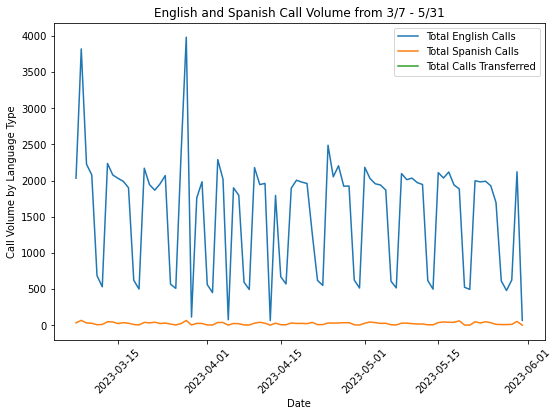

In [9]:
## Plot English and Spanish Language usage overlayed
fig, axes = plt.subplots(figsize = (8, 6))

# Plotting the first subplot
line1, = axes.plot(filtered_data['date'], filtered_data['total_english_calls'], label='Total English Calls')
line2, = axes.plot(filtered_data['date'], filtered_data['total_spanish_calls'], label='Total Spanish Calls') 

axes.set_xlabel('Date')
axes.set_ylabel('Call Volume by Language Type')
axes.set_title('English and Spanish Call Volume from 3/7 - 5/31')

# Adjusting the x-axis tick labels
plt.setp(axes.xaxis.get_majorticklabels(), rotation=45)

# Add legend
axes.legend(handles=[line1, line2, line3], loc='upper right')

# Adjusting the spacing between subplots
plt.tight_layout(pad=1.5)

# Displaying the plots
plt.show()

In [48]:
# Create table with the largest call handling since start of pilot.

# Sort the filtered_data DataFrame by col in descending order and get the top 5 values
top_col1_values = filtered_data.nlargest(5, 'total_internal_calls')
top_col2_values = filtered_data.nlargest(5, 'total_external_calls')
top_col3_values = filtered_data.nlargest(5, 'total_calls_transfered')

# Create the output table
output_table = pd.DataFrame({'Top 5 Peak Values (total_internal_calls)': top_col1_values['total_internal_calls'].values,
                            'Top 5 Peak Values (total_external_calls)': top_col2_values['total_external_calls'].values,
                            'Top 5 Peak Values (total_calls_transferred)': top_col3_values['total_calls_transfered'].values},
                           index=top_col1_values['date'])

# Display the output table
print(output_table)

            Top 5 Peak Values (total_internal_calls)  \
date                                                   
2023-03-08                                       871   
2023-03-28                                       770   
2023-03-09                                       485   
2023-04-12                                       482   
2023-05-01                                       473   

            Top 5 Peak Values (total_external_calls)  \
date                                                   
2023-03-08                                      4712   
2023-03-28                                      4605   
2023-03-09                                      2858   
2023-04-12                                      2734   
2023-05-01                                      2661   

            Top 5 Peak Values (total_calls_transferred)  
date                                                     
2023-03-08                                         3778  
2023-03-28                              

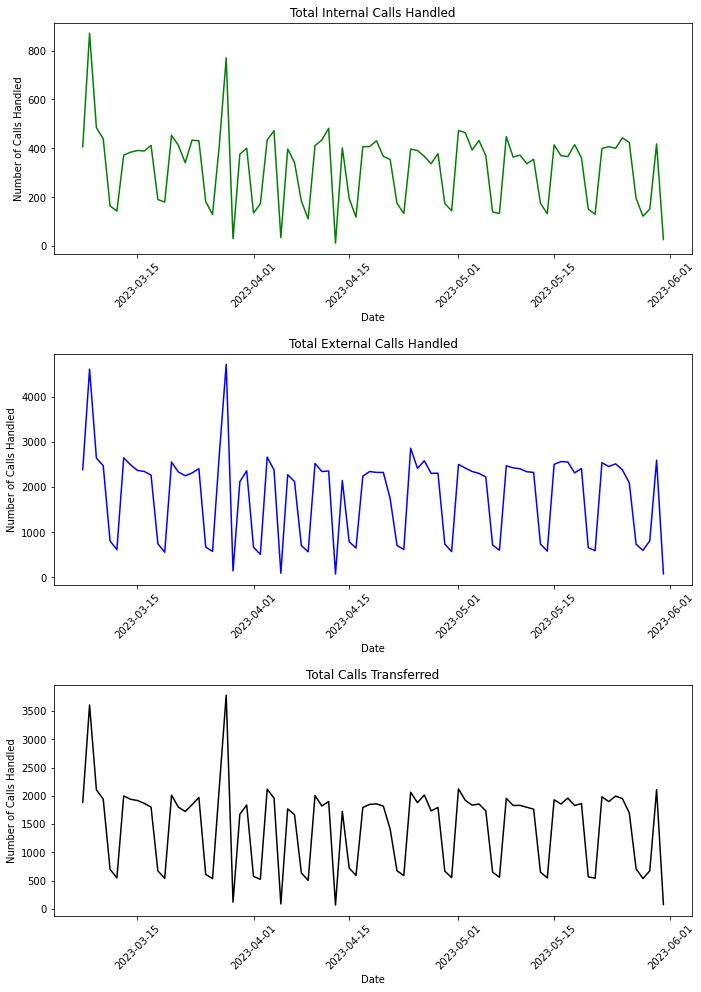

In [11]:
# Plotting internal and external call volumes
# Creating subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 14))

# Plotting the first subplot
axes[0].plot(filtered_data['date'], filtered_data['total_internal_calls'], 'g')  # Replace 'column_name1' with the actual first column you want to plot
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Calls Handled')
axes[0].set_title('Total Internal Calls Handled')

# Formatting the x-axis ticks as "mm/dd/yy" format
# axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))

# Adjusting the x-axis tick labels
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)

# Plotting the second subplot
axes[1].plot(filtered_data['date'], filtered_data['total_external_calls'], 'b')  # Replace 'column_name2' with the actual second column you want to plot
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of Calls Handled')
axes[1].set_title('Total External Calls Handled')

# Formatting the x-axis ticks as "mm/dd/yy" format
# axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))

# Adjusting the x-axis tick labels
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)

# Plotting the second subplot
axes[2].plot(filtered_data['date'], filtered_data['total_calls_transfered'], 'k')  # Replace 'column_name2' with the actual second column you want to plot
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Number of Calls Handled')
axes[2].set_title('Total Calls Transferred')

# Formatting the x-axis ticks as "mm/dd/yy" format
# axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))

# Adjusting the x-axis tick labels
plt.setp(axes[2].xaxis.get_majorticklabels(), rotation=45)



# Adjusting the spacing between subplots
plt.tight_layout(pad=1.5)

# Displaying the plots
plt.show()

In [ ]:
# Create subplots with 5 graphs
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 15))

# Plot each graph
for i, ax in enumerate(axes):
    column_name = f'total_option{i+1}_selected'
    plot_name = f'Callers Selecting Option {i+1} in Caller Menu'
    ax.plot(filtered_data['date'], filtered_data[column_name])
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Callers Selecting Option')
    ax.set_title(f'{plot_name}')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Adjust the spacing between subplots
plt.tight_layout(pad=2)

# Display the subplots
plt.show()

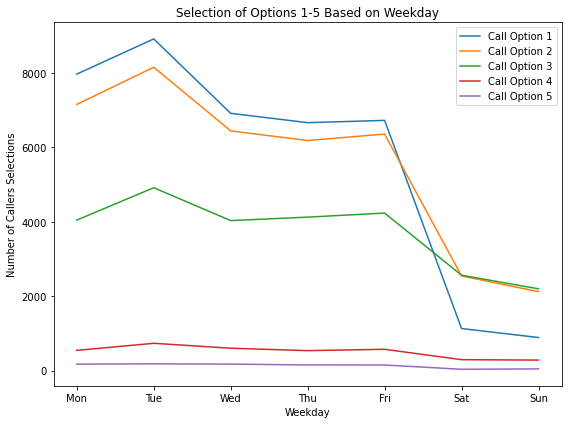

In [12]:
# Weekday analysis
# Group the data set based on calendar date
weekday_data = filtered_data.groupby("weekday").sum()

# Reset index to use data col
weekday_data = weekday_data.reset_index()

# Create subplots with 5 graphs
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(0, 5):
    column_name = f'total_option{i+1}_selected'
    metrics = f'Call Option {i+1}'
    plot_name = f'Selection of Options 1-5 Based on Weekday'
    ax.plot(weekday_data['weekday'], weekday_data[column_name], label=metrics)
    ax.set_xlabel('Weekday')
    ax.set_ylabel('Number of Callers Selections')
    ax.set_xticks(range(7))
    ax.set_title(f'{plot_name}')
    ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    ax.legend(loc='upper right')


# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()